# Morris Lecar model

## PRC of type II

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

In [52]:
trials = 300
time = 500
dt = 0.001
N = int(time/dt)
times = []
times2 = []

currents = np.ones((trials,N))*45

indexes = np.linspace(0,62612, trials)
for s in range(trials):
    trand = np.random.randint(0,62612)
    currents[s,int(313060 +indexes[s])] = 3000
    #3000
    #times.append(int(313060 +trand))
    times.append(int(313060 +indexes[s]))    

In [23]:
189000,62612*3

(189000, 187836)

In [3]:
from numba import njit

In [49]:
C = 5
g_L = 2
V_l = -60
g_ca = 4
V_ca = 120
g_K = 8
V_K = -80 
phi = 1/15
V_1 = -1.2
V_2 = 18 
V_3 =4
V_4 = 17.4
I_ext = 45

@njit
def sim(T,dt,trials, currents):
    V = np.zeros((trials,int(T/dt)))
    N = np.zeros((trials,int(T/dt)))
    num = int(T/dt)
    for s in range(trials):
        for t in range(num - 1):
            M_inf = 1/2*(1 + np.tanh((V[s,t]-V_1)/V_2))
            N_inf = 1/2*(1 + np.tanh((V[s,t]-V_3)/V_4))
            tau = phi*np.cosh((V[s,t] - V_3)/(2*V_4))
            V[s,t+1] = V[s,t]  + (currents[s,t] -g_L*(V[s,t]-V_l) - g_ca*M_inf*(V[s,t]-V_ca) -  g_K*N[s,t]*(V[s,t]-V_K))*dt/C
            N[s,t + 1] = N[s,t] + tau*(N_inf -N[s,t])*dt
    return V,N

In [53]:
V,N = sim(time,dt,trials,currents)

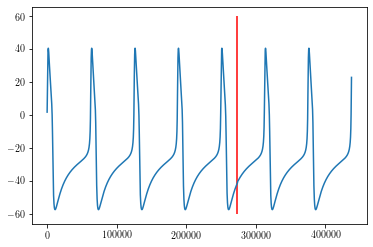

In [51]:
import matplotlib.pyplot as plt
#plt.plot(V[0,:])
#plt.vlines(times[0],-60,60,'r')
plt.plot(V[0,62612:])
plt.vlines(times[0] -62612 ,-60,60,'r')
#plt.plot(N, 'r')


In [8]:
V.shape

(300, 500000)

In [28]:
def R_helper_detector_LFP(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) and _input[i] > 40 : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)

    return(maxima)

In [10]:
62408*0.001

62.408

62442.666666666664
62351.0
3
62442.666666666664
62346.0


(189000.0, 190500.0)

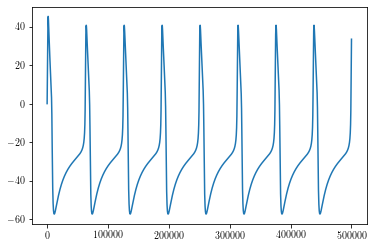

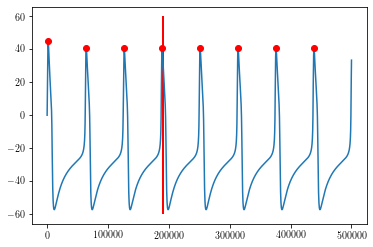

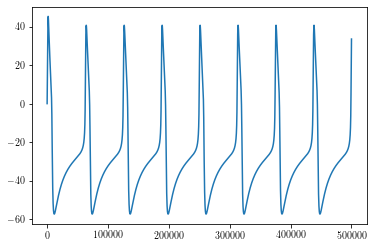

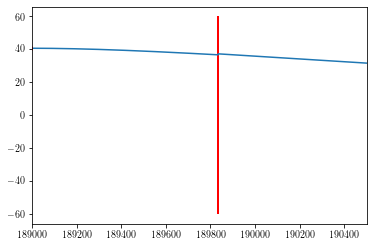

In [36]:
trial =10
t_s = times[trial]
#print(t_s)
plt.plot(V[trial,:])
#t_s = 2000
#trial = 0
peaks =R_helper_detector_LFP(V[trial,:])

#if trial < 8:
plt.figure()
plt.plot(V[trial,:])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
 #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(t_s,-60,60, 'r', lw = 2)
#plt.xlim(1000,1500)

idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
time = peaks[:,0][idx]
ts = t_s - time
#t_s = 1118
T0 = []

for r in range(len(peaks[:idx])):
    T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])


T0 = np.array(T0).mean()
T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]

print(T0)
print(T1)
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


#print(time)
#plt.xlim(500,4000)
plt.figure()


trial = 4
t_s =times[trial]
#print(t_s)
plt.plot(V[trial,:])
#t_s = 5000
#trial = 0
peaks =R_helper_detector_LFP(V[trial,:])

plt.figure()
plt.plot(V[trial,:])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
 #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(t_s,-60,60, 'r', lw = 2)
#plt.xlim(1000,1500)

idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
time = peaks[:,0][idx]
ts = t_s - time
#t_s = 1118
T0 = []
print(len(peaks[:idx]))
for r in range(len(peaks[:idx])):
    T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])
    
#print(T0)
T0 = np.array(T0).mean()
T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]

print(T0)
print(T1)
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


#print((phase))
#print((phase_stim))


#print(np.sign(phase)*(np.abs(phase)%(2*np.pi)))
#print((phase_stim)%(2*np.pi))
#print(time)
plt.xlim(189000,190000 + 500)

In [12]:
31150*0.001

31.150000000000002

In [55]:
phasestim = []
phases = []

#t_s = 1000
#specify t_s

#for elect in range(60,65):
for trial in range(trials):
    peaks =R_helper_detector_LFP(V[trial,62612:])
    
    t_s = times[trial] - 62612
    #print(peaks.shape)
    #if trial < 8:
    #    plt.figure()
    #    plt.plot(trials[trial,:,1])
    #    plt.plot(peaks[:,0],peaks[:,1], 'ro')
         #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
    #    plt.vlines(t_s,-1,1, 'r', lw = 2)
        #plt.xlim(1000,1500)

    idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
    time = peaks[:,0][idx]
    #print(time)
    ts = t_s - time
    #t_s = 1118
    T0 = []
    for r in range(len(peaks[:idx])):
        T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])

    T0 = np.array(T0).mean()
    T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]
    #print(T0 > T1)
    phase = (T0 - T1)/T0*2*np.pi
    phase_stim = ts/T0*2*np.pi
    #print(np.sign(phase) > 0)
    
    f1 = phase_stim%(2*np.pi)
    phasestim.append(f1)
    f2 = np.angle(np.exp(1j*phase))
    phases.append(f2)
    #"""
    
    #phases.append(f2)

In [56]:
phases = np.array(phases)
phasestim = np.array(phasestim)

In [54]:
import matplotlib.pyplot as plt

In [58]:
plt.rcParams['font.size'] = 26
#plt.rcParams['font.size'] = 20

Text(0, 0.5, 'Phase shift')

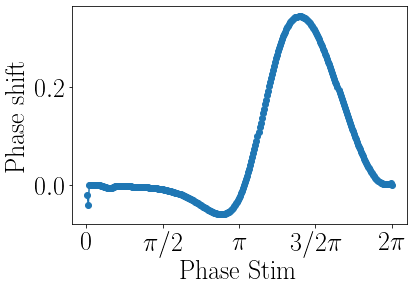

In [59]:
phases = phases[np.argsort(phasestim)]
phasestim = np.sort(phasestim)
plt.plot(phasestim,phases,'-o')
plt.xticks(np.arange(0,np.pi*2 + np.pi/2,np.pi/2), labels = ["0", "$\pi/2$","$\pi$","$3/2\pi$","$2\pi$"])
#plt.yticks(np.arange(-np.pi,np.pi + np.pi/2,np.pi/2), labels = ["$-\pi$","$\pi/2$","$0$","$\pi/2$","$\pi$"])
plt.xlabel('Phase of tim')
plt.ylabel('Phase shift')
#plt.xlim(0.3,);
#plt.ylim(-0.01,0.01)

In [61]:
from matplotlib.pyplot import cm

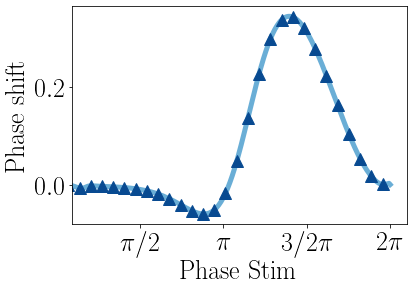

In [69]:
phases = phases[np.argsort(phasestim)]
phasestim = np.sort(phasestim)
plt.plot(phasestim,phases,'-', lw = 5, color = cm.Blues(0.5))

plt.plot(phasestim[::10],phases[::10],'^', ms = 12, color = cm.Blues(0.9))

plt.xticks(np.arange(0,np.pi*2 + np.pi/2,np.pi/2), labels = ["0", "$\pi/2$","$\pi$","$3/2\pi$","$2\pi$"])
#plt.yticks(np.arange(-np.pi,np.pi + np.pi/2,np.pi/2), labels = ["$-\pi$","$\pi/2$","$0$","$\pi/2$","$\pi$"])
plt.xlabel('Phase Stim')
plt.ylabel('Phase shift')
plt.xlim(0.3,);
#plt.ylim(-0.1,0.5)
plt.savefig('Fig/PRCtypeII.png', dpi = 300, bbox_inches = 'tight')

In [37]:
min(phases[0],  2*np.pi-phases[0])

-0.12131539559788873

In [38]:
phases[0]

-0.12131539559788873

## PRC of type I

In [1]:
import numpy as np

In [70]:
trials = 300
time = 500
dt = 0.001
I_ext = 39
N = int(time/dt)
times = []
currents = np.ones((trials,N))*I_ext

indexes = np.linspace(0,106.38/0.001, trials)

for s in range(trials):
    #trand = np.random.randint(0,106.38/0.001)
    currents[s,int(106.38/0.001*3) + int(indexes[s])] = 3000
    times.append(int(106.38/0.001*3) + int(indexes[s]))

In [86]:
from numba import njit

In [71]:
C = 5
g_L = 2
V_l = -60
g_ca = 4
V_ca = 120
g_K = 8
V_K = -80 
phi = 1/15
V_1 = -1.2
V_2 = 18 
V_3 =15
V_4 = 17.4


@njit
def sim(T,dt,trials, currents):
    V = np.zeros((trials,int(T/dt)))
    N = np.zeros((trials,int(T/dt)))
    num = int(T/dt)
    for s in range(trials):
        for t in range(num - 1):
            M_inf = 1/2*(1 + np.tanh((V[s,t]-V_1)/V_2))
            N_inf = 1/2*(1 + np.tanh((V[s,t]-V_3)/V_4))
            tau = phi*np.cosh((V[s,t] - V_3)/(2*V_4))
            V[s,t+1] = V[s,t]  + (currents[s,t] + -g_L*(V[s,t]-V_l) - g_ca*M_inf*(V[s,t]-V_ca) -  g_K*N[s,t]*(V[s,t]-V_K))*dt/C
            N[s,t + 1] = N[s,t] + tau*(N_inf -N[s,t])*dt
    return V,N
# disregard transient

In [72]:
#curr = np.ones((1,int(time/dt)))*39
V,N = sim(time,dt,trials,currents)

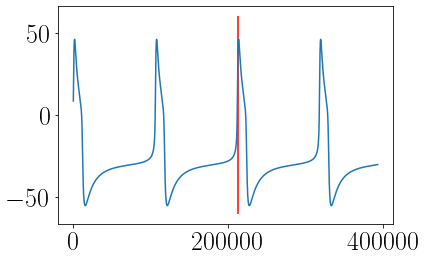

In [73]:
import matplotlib.pyplot as plt
#plt.plot(V[0,:])
#plt.vlines(times[0],-60,60,'r')
plt.plot(V[0,int(106.38/0.001):])
plt.vlines(times[0] -int(106.38/0.001) ,-60,60,'r')
#plt.plot(N, 'r')



In [74]:
def R_helper_detector_LFP(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) and _input[i] > 30 : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)

In [9]:
106137*0.001

106.137

106137.0
106076.0
3
106122.33333333333
404.0


(500.0, 31650.0)

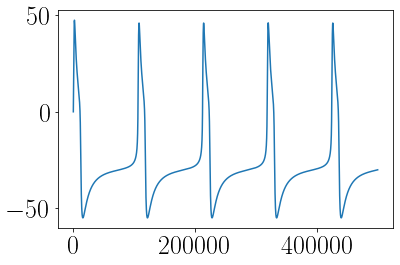

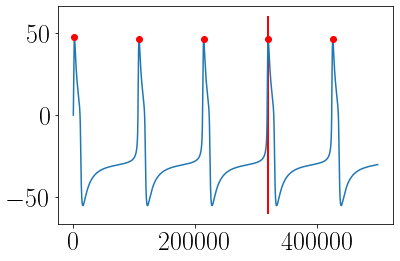

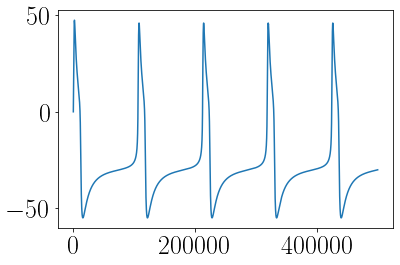

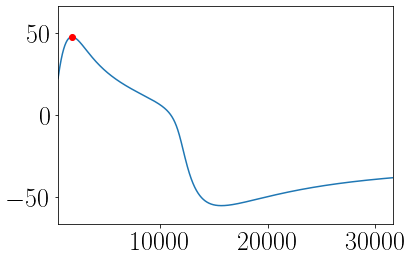

In [75]:
trial =0
t_s = times[trial]
#print(t_s)
plt.plot(V[trial,:])
#t_s = 2000
#trial = 0
peaks =R_helper_detector_LFP(V[trial,:])

#if trial < 8:
plt.figure()
plt.plot(V[trial,:])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
 #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(t_s,-60,60, 'r', lw = 2)
#plt.xlim(1000,1500)

idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
time = peaks[:,0][idx]
ts = t_s - time
#t_s = 1118
T0 = []

for r in range(len(peaks[:idx])):
    T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])


T0 = np.array(T0).mean()
T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]

print(T0)
print(T1)
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


#print(time)
#plt.xlim(500,4000)
plt.figure()


trial = 4
t_s =times[trial]
#print(t_s)
plt.plot(V[trial,:])
#t_s = 5000
#trial = 0
peaks =R_helper_detector_LFP(V[trial,:])

plt.figure()
plt.plot(V[trial,:])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
 #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(t_s,-60,60, 'r', lw = 2)
#plt.xlim(1000,1500)

idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
time = peaks[:,0][idx]
ts = t_s - time
#t_s = 1118
T0 = []
print(len(peaks[:idx]))
for r in range(len(peaks[:idx])):
    T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])
    
#print(T0)
T0 = np.array(T0).mean()
T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]

print(T0)
print(T1)
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


#print((phase))
#print((phase_stim))


#print(np.sign(phase)*(np.abs(phase)%(2*np.pi)))
#print((phase_stim)%(2*np.pi))
#print(time)
plt.xlim(500,31150 + 500)

In [11]:
31150*0.001

31.150000000000002

In [77]:
phasestim = []
phases = []

#t_s = 1000
#specify t_s

#for elect in range(60,65):
for trial in range(trials):
    peaks =R_helper_detector_LFP(V[trial,int(106.38/0.001):])
    
    t_s = times[trial] - int(106.38/0.001)
    #print(peaks.shape)
    #if trial < 8:
    #    plt.figure()
    #    plt.plot(trials[trial,:,1])
    #    plt.plot(peaks[:,0],peaks[:,1], 'ro')
         #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
    #    plt.vlines(t_s,-1,1, 'r', lw = 2)
        #plt.xlim(1000,1500)

    idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
    time = peaks[:,0][idx]
    #print(time)
    ts = t_s - time
    #t_s = 1118
    T0 = []
    for r in range(len(peaks[:idx])):
        T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])

    T0 = np.array(T0).mean()
    T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]
    #print(T0 > T1)
    phase = (T0 - T1)/T0*2*np.pi
    phase_stim = ts/T0*2*np.pi
    #print(np.sign(phase) > 0)
  
    f1 = phase_stim%(2*np.pi)
    phasestim.append(f1)
    f2 = np.angle(np.exp(1j*phase))
    phases.append(f2)
    #phasestim.append((phase_stim)%(2*np.pi))
    #phases.append((phase)%(2*np.pi))

In [78]:
phases = np.array(phases)
phasestim = np.array(phasestim)

In [14]:
plt.rcParams['font.size'] = 25
#plt.rcParams['font.size'] = 20

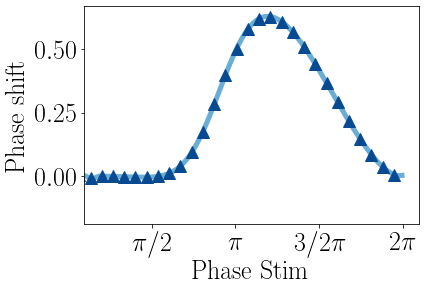

In [80]:
phases = phases[np.argsort(phasestim)]
phasestim = np.sort(phasestim)
plt.plot(phasestim,phases,'-', lw = 5, color = cm.Blues(0.5))

plt.plot(phasestim[::10],phases[::10],'^', ms = 12, color = cm.Blues(0.9))

plt.xticks(np.arange(0,np.pi*2 + np.pi/2,np.pi/2), labels = ["0", "$\pi/2$","$\pi$","$3/2\pi$","$2\pi$"])
#plt.yticks(np.arange(-np.pi,np.pi + np.pi/2,np.pi/2), labels = ["$-\pi$","$\pi/2$","$0$","$\pi/2$","$\pi$"])
plt.xlabel('Phase Stim')
plt.ylabel('Phase shift')
plt.xlim(0.3,);
#plt.ylim(-0.1,0.5)
plt.savefig('Fig/PRCtypeI.png', dpi = 300, bbox_inches ='tight')